In [1]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df_orig = pd.read_csv("data/cumulative.csv")
df_orig.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [3]:
df_orig.size

478200

In [4]:
#df = df_orig.head(1000)

In [5]:
df = df_orig.drop(columns=["rowid", "kepid", "kepoi_name", "kepler_name", "koi_pdisposition", "koi_score", "koi_tce_delivname"])
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,FALSE POSITIVE,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,CONFIRMED,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [6]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

label_encoder.fit(df['koi_disposition'])
label_encoder.classes_

array(['CANDIDATE', 'CONFIRMED', 'FALSE POSITIVE'], dtype=object)

In [7]:
df['koi_disposition'] = label_encoder.transform(df['koi_disposition'])

In [8]:
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,1,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,2,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,1,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


# Create a Train Test Split

Use `koi_disposition` for the y values

In [9]:
X = df[[ 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2']]

#        'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
#        'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
#        'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
#        'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
#        'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
#        'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
#        'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
#        'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
#        'koi_kepmag']]

In [10]:
y = df['koi_disposition'].values.reshape(-1,1)
y

array([[1],
       [1],
       [2],
       ...,
       [0],
       [2],
       [2]])

In [11]:
X = pd.get_dummies(X)
X.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2
0,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05
1,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04
2,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05
3,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07
4,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [13]:
y_train

array([[2],
       [2],
       [0],
       ...,
       [2],
       [1],
       [2]])

In [14]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2
8017,0,1,1,0,0.806277,4.947000e-06,-4.947000e-06
1233,0,1,1,0,3.582077,4.318000e-06,-4.318000e-06
2592,0,0,0,0,5.060923,2.616000e-05,-2.616000e-05
4770,0,1,0,1,8.480304,3.320000e-07,-3.320000e-07
6632,0,0,0,1,4.994716,4.495000e-05,-4.495000e-05


# Pre-processing

Scale the data using the MinMaxScaler

In [15]:
from sklearn.preprocessing import MinMaxScaler
X_minmax = MinMaxScaler().fit(X_train)
y_minmax = MinMaxScaler().fit(y_train)

In [16]:
X_train_minmax = X_minmax.transform(X_train)
X_test_minmax = X_minmax.transform(X_test)
y_train_minmax = y_minmax.transform(y_train)
y_test_minmax = y_minmax.transform(y_test)

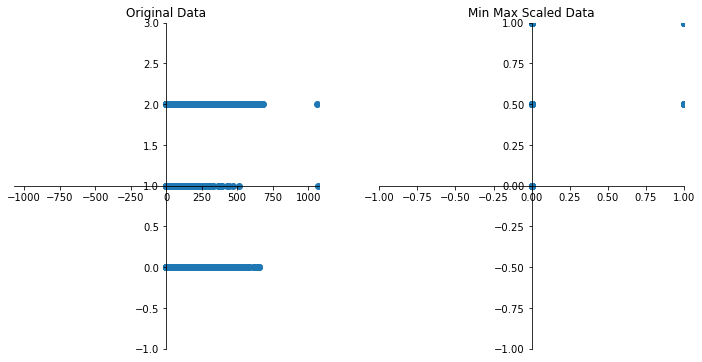

In [18]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Min Max Scaled Data")

maxx = X_train["koi_period"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-1, 1)
axes2.set_ylim(-1, 1)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["koi_period"], y_train)
axes2.scatter(X_train_minmax[:,0], y_train_minmax[:])

Pre-processing
Scale the data using the StandardScaler

In [19]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit(X_train)
y_scaled = StandardScaler().fit(y_train)

In [20]:
X_train_scaled = X_scaled.transform(X_train)
X_test_scaled = X_scaled.transform(X_test)
y_train_scaled = y_scaled.transform(y_train)
y_test_scaled = y_scaled.transform(y_test)

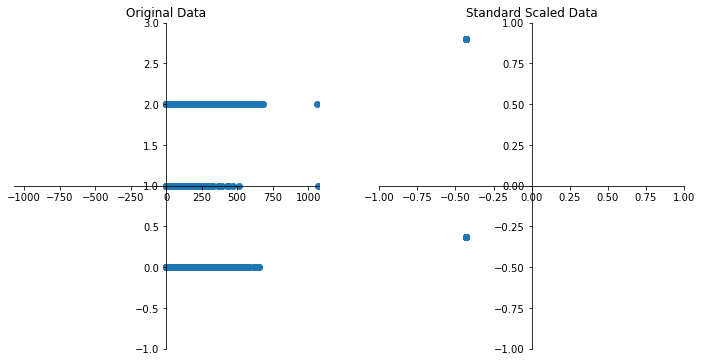

In [21]:
import matplotlib.pyplot as plt

fig2 = plt.figure(figsize=(12, 6))
axes12 = fig2.add_subplot(1, 2, 1)
axes22 = fig2.add_subplot(1, 2, 2)

axes12.set_title("Original Data")
axes22.set_title("Standard Scaled Data")

maxx = X_train["koi_period"].max()
maxy = y_train.max()
axes12.set_xlim(-maxx + 1, maxx + 1)
axes12.set_ylim(-maxy + 1, maxy + 1)

axes22.set_xlim(-1, 1)
axes22.set_ylim(-1, 1)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes12)
set_axes(axes22)

axes12.scatter(X_train["koi_period"], y_train)
axes22.scatter(X_train_scaled[:,0], y_train_scaled[:])

# Train the Support Vector Machine

In [22]:
%%time
from sklearn.svm import SVC
model1 = SVC(kernel='linear')
model1.fit(X_train, y_train)
model1

CPU times: user 1min 46s, sys: 248 ms, total: 1min 46s
Wall time: 1min 47s


In [23]:
print(f"Training Data Score: {model1.score(X_train, y_train)}")
print(f"Testing Data Score: {model1.score(X_test, y_test)}")

Training Data Score: 0.7816407441293077
Testing Data Score: 0.7772186642268984


# Hyperparameter Tuning

Use `GridSearchCV` to tune the `C` and `gamma` parameters

# Create the GridSearchCV model

In [26]:
%%time
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [10,50],
             'gamma': [0.0001, 0.0005]}
grid = GridSearchCV(model1, param_grid, verbose=3)

In [27]:
# Train the model with GridSearch
grid.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... C=1, gamma=0.0001, score=0.782, total= 1.1min
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.782, total=  41.9s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.7min remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.783, total=  55.4s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.782, total= 1.3min
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.782, total=  58.7s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.783, total= 1.1min
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.782, total= 1.3min
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.782, total=  49.2s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.783, total= 1.2min
[CV] C=1, gamma=0.005 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed: 100.0min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [28]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 50, 'gamma': 0.0001}
0.7833180847819458
